# U.S. Medical Insurance Costs

Dataset has been provided publicly by https://www.kaggle.com/datasets/mirichoi0218/insurance

This is a python analysis project by @tylershienlim through codecademy's Data Scientist: Analytics learning path.

Data Analysis and cleaning, combined with a simple prediction model to predict insurace costs for patients.


reference - https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial

In [12]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#read file
df = pd.read_csv('insurance.csv')

# Code

### Initial Observation of dataframe

- no missing values in the dataset
- 3 columns of categorical values
- 4 different regions
- youngest person is age 18, oldest is age 64
- Age isn't entirely skewed right, but higher frequency of ages 18 - 22 range
- 3 different insurance price range, age is correlated to insurance charges

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


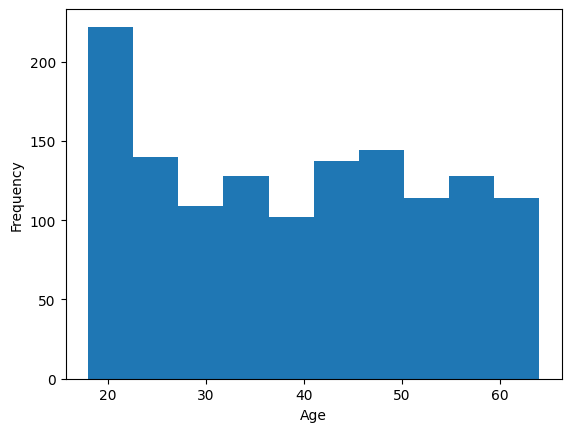

In [16]:
#Age spread
plt.hist(df.age)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.close()

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-pa

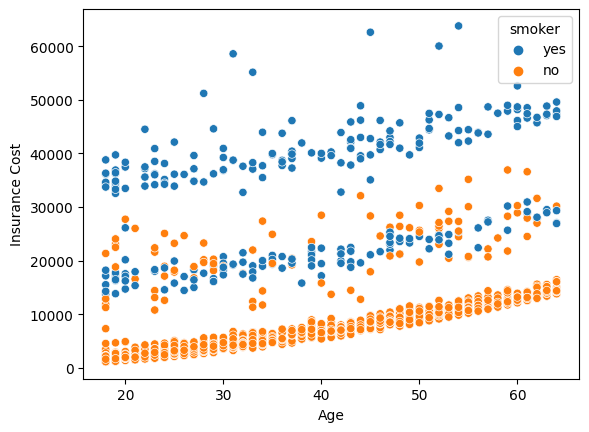

In [17]:
#Age against insurance cost
sns.scatterplot(x=df.age, y=df.charges, hue=df.smoker)
plt.xlabel('Age')
plt.ylabel('Insurance Cost')
plt.show()
plt.close()

In [18]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

### Region observations

- 4 unique regions in the dataset
- The 4 regions have the same mean insurance cost
- Southeast region seems to have the higher max end range of insurance cost
- All regions have signifant amount of outliers, possibly could be disregarded

In [19]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


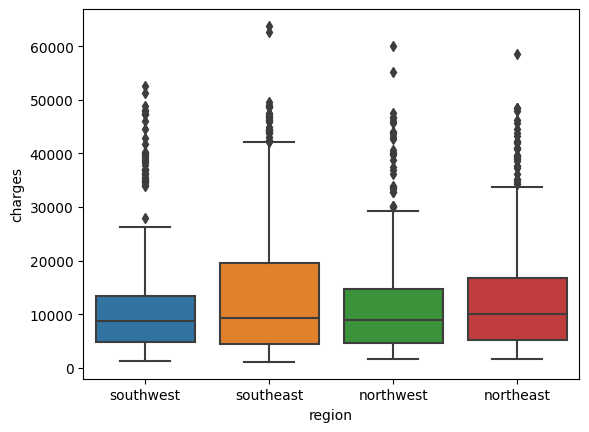

In [20]:
#region and cost
sns.boxplot(data=df, x=df.region, y=df.charges)
plt.show()
plt.close()

### Male vs Female observations

- there are 676 males, 662 females in this dataset (fairly balanced)
- male average insurance cost is 13956.75
- female average insurance cost is 12569.59

In [21]:
male = df[df['sex'] == 'male']
female = df[df['sex'] == 'female']

In [22]:
male.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,676.000000,676,676.000000,676.000000,676,676,676.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,517,189,NaN
mean,38.917160,NaN,30.943129,1.115385,NaN,NaN,13956.751178
std,14.050141,NaN,6.140435,1.218986,NaN,NaN,12971.025915
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.410000,0.000000,NaN,NaN,4619.134000
50%,39.000000,NaN,30.687500,1.000000,NaN,NaN,9369.615750
75%,51.000000,NaN,34.992500,2.000000,NaN,NaN,18989.590250


In [23]:
female.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,662.000000,662,662.000000,662.000000,662,662,662.000000
unique,NaN,1,NaN,NaN,2,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,662,NaN,NaN,547,175,NaN
mean,39.503021,NaN,30.377749,1.074018,NaN,NaN,12569.578844
std,14.054223,NaN,6.046023,1.192115,NaN,NaN,11128.703801
min,18.000000,NaN,16.815000,0.000000,NaN,NaN,1607.510100
25%,27.000000,NaN,26.125000,0.000000,NaN,NaN,4885.158700
50%,40.000000,NaN,30.107500,1.000000,NaN,NaN,9412.962500
75%,51.750000,NaN,34.313750,2.000000,NaN,NaN,14454.691825


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


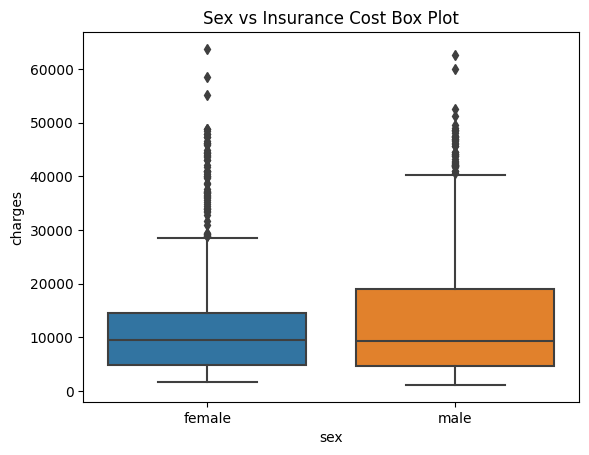

In [24]:
sns.boxplot(x=df.sex, y=df.charges)
plt.title('Sex vs Insurance Cost Box Plot')
plt.show()
plt.close()

### Smokers vs Non-Smokers observations
 - 274 smokers, 1064 non smokers
 - smokers average insurance cost is 32050.23
 - non smokers average insurance cost is 8434
 - smoking highly correlated to higher insurance cost (refer to boxplot)

In [25]:
smoker = df[df['smoker'] == 'yes']
nonsmoker = df[df['smoker'] == 'no']

In [26]:
print("Smoker:\n")
print(smoker.describe())
print("\n")
print("Non Smoker:\n")
print(nonsmoker.describe())

Smoker:

              age         bmi    children       charges
count  274.000000  274.000000  274.000000    274.000000
mean    38.514599   30.708449    1.113139  32050.231832
std     13.923186    6.318644    1.157066  11541.547176
min     18.000000   17.195000    0.000000  12829.455100
25%     27.000000   26.083750    0.000000  20826.244213
50%     38.000000   30.447500    1.000000  34456.348450
75%     49.000000   35.200000    2.000000  41019.207275
max     64.000000   52.580000    5.000000  63770.428010


Non Smoker:

               age          bmi     children       charges
count  1064.000000  1064.000000  1064.000000   1064.000000
mean     39.385338    30.651795     1.090226   8434.268298
std      14.083410     6.043111     1.218136   5993.781819
min      18.000000    15.960000     0.000000   1121.873900
25%      26.750000    26.315000     0.000000   3986.438700
50%      40.000000    30.352500     1.000000   7345.405300
75%      52.000000    34.430000     2.000000  11362.887050


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


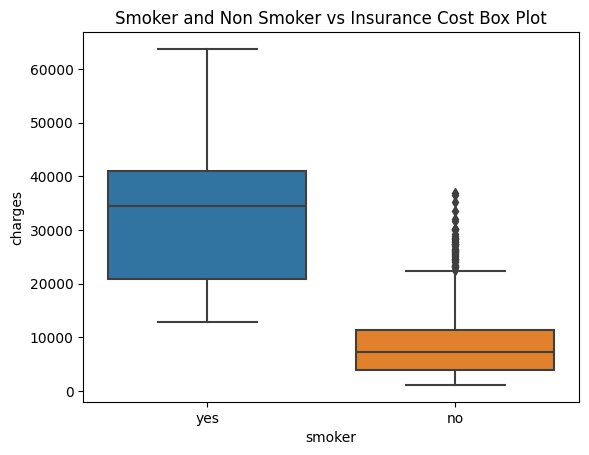

In [27]:
sns.boxplot(x=df.smoker, y=df.charges)
plt.title('Smoker and Non Smoker vs Insurance Cost Box Plot')
plt.show()
plt.close()

#### Dataframe encoding changes
Replace all categorical values into numerical values to:
- create correlation matrix to view
- make it easier for any further analysis/predictive model later on

In [28]:
df.sex = df.sex.replace({
    'female':0,
    'male':1
})
df.smoker = df.smoker.replace({
    'no':0,
    'yes':1
})
df.region = df.region.replace({
    'southwest':0,
    'southeast':1,
    'northwest':2,
    'northeast':3
})

Correlation Matrix

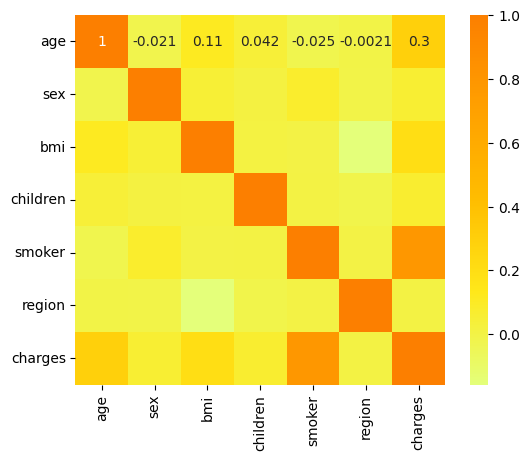

In [29]:
corr = df.corr()
sns.heatmap(
    corr,
    cmap='Wistia',
    annot=True,
    square=True
)
plt.show()
plt.close()

# Prediction on insurance cost

Based on visualizations and correlation observed, the feature that impact insurance costs the most are 
- smoker

Other features that have minor correlation to insurance charges are:
- age
- bmi
- sex

Since the data has been converted to purely numerical inputs, and the prediction feature is numerical/continuous data, the algorithm chosen is Linear Regression Model


In [30]:
# all libraries to be used for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Linear Regression Model

Two different data splits to observe if removing children and region features would result in a better/worse prediction accuracy

In [31]:
#clean/split data
X, y = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']], df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X2, y2 = df[['age', 'sex', 'bmi', 'smoker']], df['charges']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

Regression model for first option (inclusive of all feature columns)

In [32]:
#fit data
reg = LinearRegression()
reg.fit(X_train, y_train)

#predict data
y_pred = reg.predict(X_test)

#score
print(f'The accuracy of this model is: {reg.score(X_test, y_test)} \n')
#print(f'The mean square error of this model is: {mean_squared_error(y_pred, y_test)}')


The accuracy of this model is: 0.7602640802497019 



Regression model for second option (excluding children and region feature columns)

In [33]:
#fit data
reg2 = LinearRegression()
reg2.fit(X_train2, y_train2)

#predict data
y_pred2 = reg2.predict(X_test2)

#score
print(f'The accuracy of this model is: {reg2.score(X_test2, y_test2)} \n')
#print(f'The mean square error of this model is: {mean_squared_error(y_pred2, y_test2)}')

The accuracy of this model is: 0.7551179923391564 

